In [274]:
import requests
from requests import get
from bs4 import BeautifulSoup
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

In [275]:
for year_url in years_url:
    for page in pages:
        response = requests.get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = {"Accept-Language": "en-US, en;q=0.5"})
        soup = BeautifulSoup(response.content,'html.parser')
        content = soup.find(id="content-2-wide")
        movie = content.find_all(class_="lister-item mode-advanced")
        for m in movie:
            if m.find('div', class_ = 'ratings-metascore') is not None:
                name = m.h3.a.text
                names.append(name)
                year = m.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)
                imdb = float(m.strong.text)
                imdb_ratings.append(imdb)
                score = m.find('span', class_ = 'metascore').text
                metascores.append(int(score))
                vote = m.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))


In [276]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'meta score': metascores,
                       'votes': votes})
test_df.head()

,imdb,meta score,movie,votes,year
0,8.5,67,Gladiator,1107179,(2000)
1,8.5,80,Memento,951879,(2000)
2,8.3,55,Snatch,668651,(2000)
3,8.3,68,Requiem for a Dream,646173,(2000)
4,7.4,64,X-Men,501634,(2000)


In [277]:
test_df['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2003)', '(I) (2003)', '(2004)', '(I) (2004)',
       '(2005)', '(I) (2005)', '(2006)', '(I) (2006)', '(2007)',
       '(I) (2007)', '(2008)', '(I) (2008)', '(2009)', '(I) (2009)',
       '(II) (2009)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(III) (2017)', '(II) (2017)', '(IV) (2017)'], dtype=object)

In [279]:
import re
y=[]
for e in test_df['year']:
    r=re.findall(r'[0-9]+',str(e))
    y.append(r[0])
test_df['year']=y[:]

,meta score,imdb
meta score,1.000000,0.758256
imdb,0.758256,1.000000


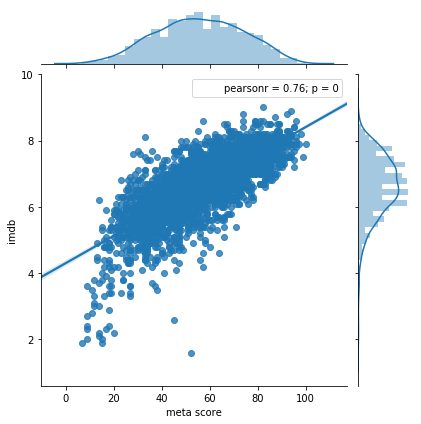

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x='meta score', y='imdb', data=test_df, kind="reg")
test_df[['meta score', 'imdb']].corr()

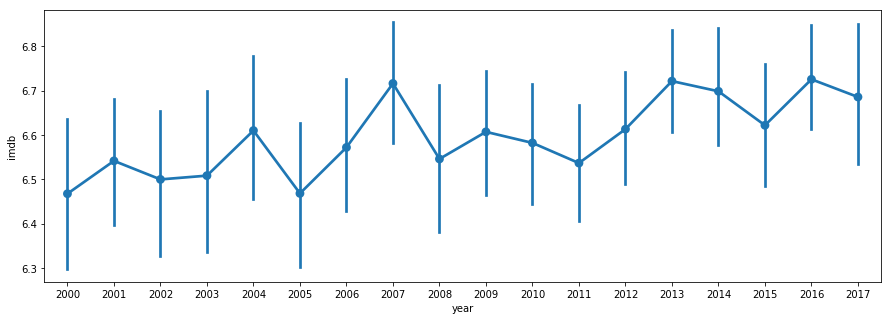

In [285]:
plt.figure(figsize=(15,5))
sns.pointplot(x='year', y='imdb', data=test_df)

In [287]:
movie2004 = test_df[test_df['year'] =='2007']
movie2004_top = movie2004.sort_values('imdb',ascending=False)[:5]
movie2004_top

,imdb,meta score,movie,votes,year
1271,8.3,68,Chak de! India,59687,2007
1321,8.2,83,The King of Kong: A Fistful of Quarters,32266,2007
1168,8.1,91,No Country for Old Men,697577,2007
1174,8.1,73,Into the Wild,484106,2007
1252,8.1,90,Persepolis,77215,2007
